In [1]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
import os
from bubbles import *
import plotly.express as px
import plotly.graph_objects as go
import cv2 as cv

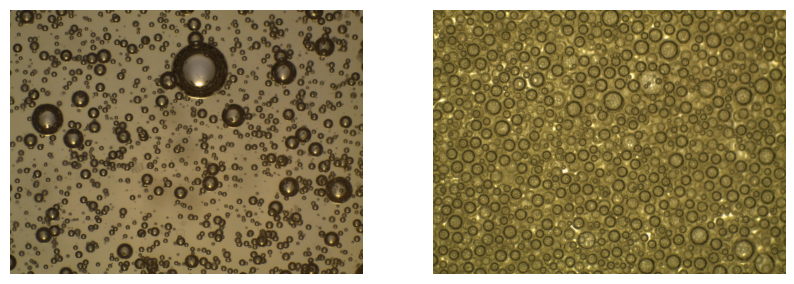

In [2]:
ims = import_photos_and_background('data')

plot_images([ims[0], ims[1]])

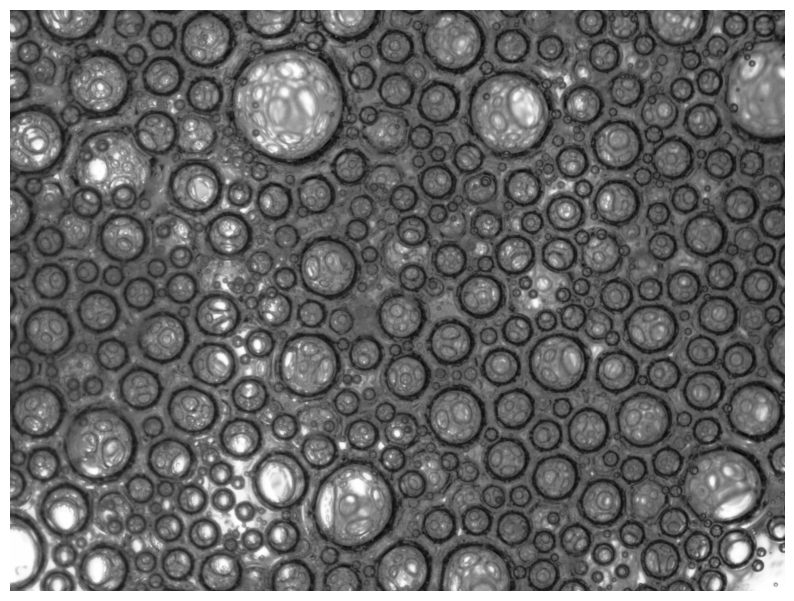

In [295]:
def greyscale(ims):
    greys = []
    for im in ims:
        avg = np.median(im, axis = (0,1))
        im_norm = im / avg
        greys.append(im_norm.sum(axis = -1))
    return np.array(greys)

grey = greyscale(ims)
plot_images([grey[2]])

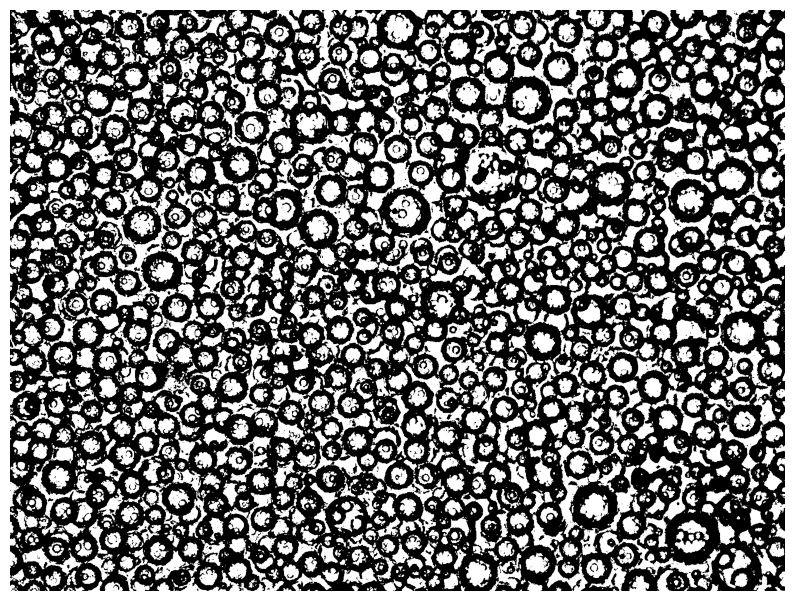

In [531]:
im = grey[1]
Nid = 70
idker = np.ones((Nid,Nid))/Nid**2
 
norm_map = cv.filter2D(src=im, ddepth=-1, kernel=idker)
norm = im - norm_map

_, thres_image = cv.threshold(norm, 0.2, 1, cv.THRESH_BINARY)

plot_images([thres_image])

In [624]:
constellation = []
for N in range(5,100,2):
    bubbleker = bubble_kernel([0.5,0.8,0.85,1], N)
    conv = cv.filter2D(src=thres_image, ddepth=-1, kernel=bubbleker) 
    constellation.append(conv)
constellation = np.array(constellation)
constellation -= constellation.min(axis=(1,2)).reshape(-1,1,1)
constellation /= constellation.max(axis=(1,2)).reshape(-1,1,1)

constellation_thres = []
for layer in constellation:
    _, thres = cv.threshold(layer, 0.8, 1, cv.THRESH_BINARY)
    constellation_thres.append(thres)
constellation_thres = np.array(constellation_thres, dtype = np.uint8)


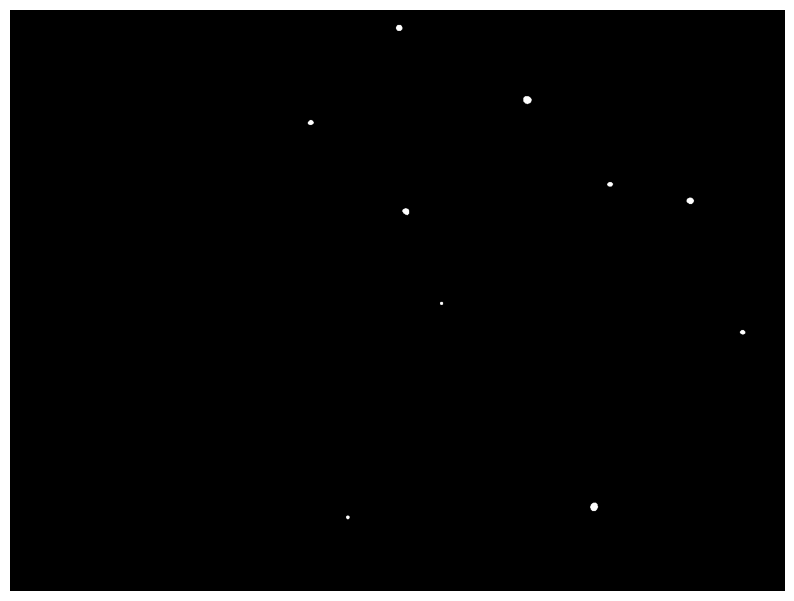

In [632]:
plot_images(constellation_thres[-1])

In [695]:
constellation_stack = constellation_thres.sum(axis = 0)
constellation_stack = np.array(constellation_stack>0, dtype = np.uint8)

# plot_images([thres, thres_conv*conv])
# fig, ax = plt.subplots(figsize = (15,15))
# ax.imshow(np.ones(im.shape))
# ax.imshow(im, alpha=0.8)
# ax.imshow(thres_layer, alpha=thres_layer, cmap = 'Reds')

# plot_images(thres_layer)

number, labels = cv.connectedComponents(constellation_stack, 8)

mask = labels == 6

np.arrange(constellation_thres.shape[0])[np.any(constellation_thres*mask, axis = 0)]


AttributeError: module 'numpy' has no attribute 'arrange'

In [685]:
np.array(constellation_stack>0, dtype = np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

(1200, 12800)

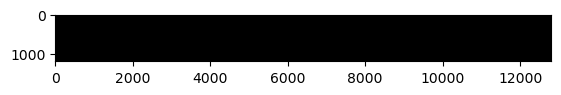

In [621]:
plt.imshow(labels == 1)
thres_layer = constellation_thres[40]
thres_layer.dtype = np.uint8
# number, labels = cv.connectedComponents(thres_layer, 8)

thres_layer.shape

{(0, 18, 20): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x22c85be80>,
 (0, 18, 35): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2445986a0>,
 (0, 52, 23): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x244598a30>,
 (1, 0, 36): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x244598dc0>,
 (1, 0, 88): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cb190>,
 (1, 2, 97): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cb520>,
 (1, 9, 2): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cb8b0>,
 (1, 25, 52): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cbc40>,
 (1, 26, 15): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531cbfd0>,
 (1, 56, 8): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531db3a0>,
 (2, 0, 36): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531db730>,
 (2, 23, 15): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531dbac0>,
 (2, 28, 20): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2531dbe50>,
 (2, 70, 20): <mpl_

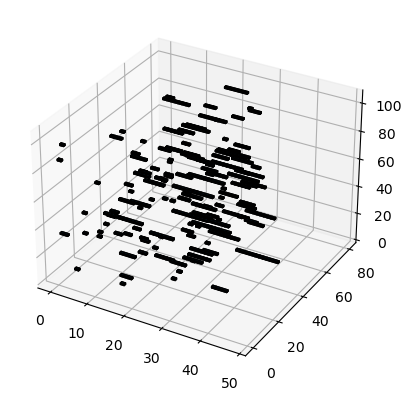

In [581]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(constellation_thres[:,::15,::15], edgecolor='k')

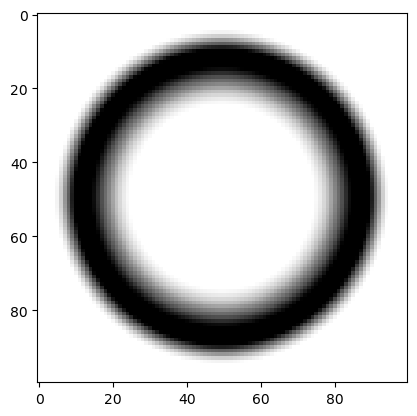

In [574]:
def circle_density(x, params):
    a,b,c,d = params
    spike = np.min([(x-a)/(b-a), np.ones(x.shape), (d-x)/(d-c)], axis = 0)
    return np.max([spike, np.zeros(x.shape)], axis = 0)

def bubble_kernel(params, N):
    a,b,c,d = params
    a *= N/2
    b *= N/2
    c *= N/2
    d *= N/2
    xx, yy = np.mgrid[:N, :N]
    dist = (xx - (N-1)/2)**2 + (yy - (N-1)/2)**2
    dist = np.sqrt(dist)
    bub = -circle_density(dist, [a,b,c,d])
    bub -= bub.mean()
    bub /= bub.std()
    return bub / bub.std()

plt.imshow(bubble_kernel([0.5,0.7,0.80,0.9], 100))

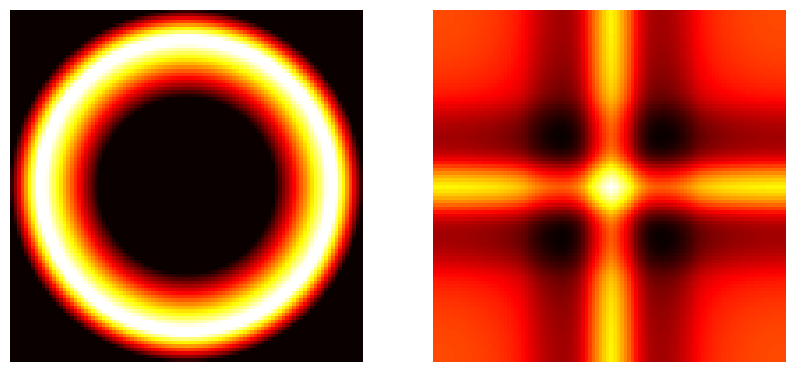

In [216]:
bubbleker = bubble_kernel([0.5,0.8,0.85,1], 100)
bubbleker1 = bubble_kernel([0.5,0.8,0.85,1], 100)
 
identity = cv.filter2D(src=bubbleker1, ddepth=-1, kernel=bubbleker)

plot_images([bubbleker1, identity], cmap = 'hot')